# **Exercises 3, part 1/2**. Numpy

Computes and print, based on the data in populations.txt (use loadtxt to read the file)...

- The mean and std of the populations of each species for the years in the period.
- Which year each species had the largest population.
- Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
- Which years any of the populations is above 50000. (Hint: comparisons and np.any)
- The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
- Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).

... all without for-loops.

In [1]:
import numpy as np

In [2]:
dat = np.loadtxt("populations.txt")

### The mean and std of the populations of each species for the years in the period.

In [3]:
mean = dat[:,1:].sum(axis = 0)/dat[:,0].size
std = np.std(dat[:,1:], axis=0)

from tabulate import tabulate

data = {'Value': ['Mean', 'Std. Dev.'], 
        'Hares': [mean[0], std[0]],
        'Lynx': [mean[1], std[1]],
        'Carrots': [mean[2], std[2]]}
  
print(tabulate(data, headers='keys',tablefmt='fancy_grid'))

╒═══════════╤═════════╤═════════╤═══════════╕
│ Value     │   Hares │    Lynx │   Carrots │
╞═══════════╪═════════╪═════════╪═══════════╡
│ Mean      │ 34081   │ 20166.7 │  42400    │
├───────────┼─────────┼─────────┼───────────┤
│ Std. Dev. │ 20897.9 │ 16254.6 │   3322.51 │
╘═══════════╧═════════╧═════════╧═══════════╛


### Which year each species had the largest population.

In [4]:
print("Hares: ",dat[:,0][np.argmax(dat[:,1])])
print("Lynx: ", dat[:,0][np.argmax(dat[:,2])])
print("Carrots: ", dat[:,0][np.argmax(dat[:,3])])

Hares:  1903.0
Lynx:  1904.0
Carrots:  1900.0


### Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))

In [5]:
Y = dat[:,0]
H = dat[:,1]
L = dat[:,2]
C = dat[:,3]

y = np.ndarray.tolist(Y)

c = np.argmax(np.argsort(np.vstack([[H],[L],[C]]), axis = 0).T,axis=1)
b = np.ndarray.tolist(c)

b = ['Hare' if item == 0 else item for item in b]
b = ['Lynx' if item == 1 else item for item in b]
b = ['Carrot' if item == 2 else item for item in b]

dict = {'Year':Y,'Maximum of':b}
print(tabulate(dict, headers='keys',tablefmt='fancy_grid'))

╒════════╤══════════════╕
│   Year │ Maximum of   │
╞════════╪══════════════╡
│   1900 │ Carrot       │
├────────┼──────────────┤
│   1901 │ Carrot       │
├────────┼──────────────┤
│   1902 │ Lynx         │
├────────┼──────────────┤
│   1903 │ Lynx         │
├────────┼──────────────┤
│   1904 │ Lynx         │
├────────┼──────────────┤
│   1905 │ Lynx         │
├────────┼──────────────┤
│   1906 │ Carrot       │
├────────┼──────────────┤
│   1907 │ Carrot       │
├────────┼──────────────┤
│   1908 │ Carrot       │
├────────┼──────────────┤
│   1909 │ Carrot       │
├────────┼──────────────┤
│   1910 │ Carrot       │
├────────┼──────────────┤
│   1911 │ Carrot       │
├────────┼──────────────┤
│   1912 │ Lynx         │
├────────┼──────────────┤
│   1913 │ Lynx         │
├────────┼──────────────┤
│   1914 │ Hare         │
├────────┼──────────────┤
│   1915 │ Lynx         │
├────────┼──────────────┤
│   1916 │ Carrot       │
├────────┼──────────────┤
│   1917 │ Carrot       │
├────────┼──

### Which years any of the populations is above 50000. (Hint: comparisons and np.any)

In [6]:
# np.any(a, axis=None)

d = np.vstack([[H],[L],[C]]).T
f = np.greater(d,50000)
e = np.any(f, axis=1)
Y[e]

array([1902., 1903., 1904., 1912., 1913., 1914., 1915.])

### The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)

In [7]:
c = np.argsort(np.vstack([[H],[L],[C]]), axis = 1).T

# Hares
print("Worst years for hares: ",Y[np.where(c[:,0] <=1 )])
# Lynx
print("Worst years for lynx: ",Y[np.where(c[:,1] <=1 )])
# Carrots
print("Worst years for carrots: ",Y[np.where(c[:,2] <=1 )])

Worst years for hares:  [1912. 1915.]
Worst years for lynx:  [1900. 1901.]
Worst years for carrots:  [1919. 1920.]


### Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).

Correlation:  -0.9179248480315342 



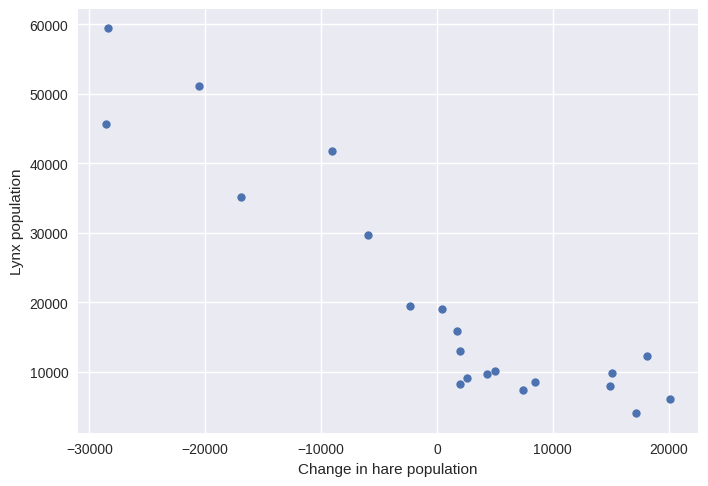

In [8]:
import matplotlib.pyplot as plt

gH = np.gradient(H)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(gH,L,marker='o',linewidth=0,markersize=6)
ax.set_xlabel("Change in hare population")
ax.set_ylabel("Lynx population")


print("Correlation: ",np.corrcoef(gH,L)[1,0],"\n")
plt.show()